In [21]:
#Predicting If a Person will stay in a company or not
#this is a Binary logistic regression problem because only two possible outcomes stay  or not stay 

In [22]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline


In [23]:
df=pd.read_csv("HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


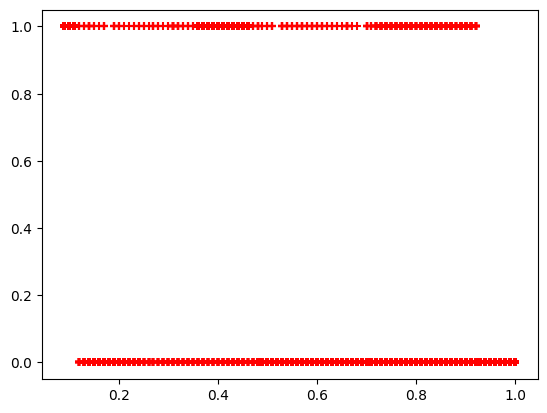

In [24]:
plt.scatter(df.satisfaction_level,df.left,marker='+',color='red')

In [25]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df[['satisfaction_level']],df.left,train_size=0.8)

In [32]:
X_test

,satisfaction_level
4045,0.91
12398,0.87
4991,0.79
6107,0.62
11128,0.96
...,...
12475,0.45
8239,0.97
10755,0.29
11725,0.16


In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [36]:
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
X_test

,satisfaction_level
4045,0.91
12398,0.87
4991,0.79
6107,0.62
11128,0.96
...,...
12475,0.45
8239,0.97
10755,0.29
11725,0.16


In [39]:
y_predicted = model.predict(X_test)

In [40]:
model.predict_proba(X_test)

array([[0.92720047, 0.07279953],
       [0.91595139, 0.08404861],
       [0.88862606, 0.11137394],
       ...,
       [0.5319883 , 0.4680117 ],
       [0.4064834 , 0.5935166 ],
       [0.75071994, 0.24928006]])

In [41]:
model.score(X_test,y_test)

0.7506666666666667

In [42]:
y_predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [43]:
X_test

,satisfaction_level
4045,0.91
12398,0.87
4991,0.79
6107,0.62
11128,0.96
...,...
12475,0.45
8239,0.97
10755,0.29
11725,0.16


In [44]:
#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

array([[-3.89730989]])

In [45]:
#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

array([1.00209168])

In [46]:
#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))



In [47]:
def prediction_function(age):
    z = (-3.9) * satisfaction_level + 1.002 
    y = sigmoid(z)
    return y

In [48]:
satisfaction_level = 0.92
prediction_function(satisfaction_level)

0.07004488960508369

In [ ]:
#0.0700 is less than 0.5 which means person with 0.92 satisfaction will  stay the company 


In [49]:
satisfaction_level = 0.58
prediction_function(satisfaction_level)

0.22097389222018782

In [ ]:
#0.2200 is less than 0.5 which means person with 0.58 satisfaction will  stay the company 

In [51]:
satisfaction_level = 0.1
prediction_function(satisfaction_level)

0.6483968940175652

In [ ]:
#0.6500 is greater than 0.5 which means person with 0.1 satisfaction will leave the company 